In [29]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import datetime
import time
from itertools import islice
import glob
import io

In [30]:
def create_date_col(df):
    date_lst = []
    for index, row in df.iterrows():
        day = str(df['ride_begin'][index].day)
        month = str(df['ride_begin'][index].month)
        year = str(df['ride_begin'][index].year)
        date_text = year + '-' + month + '-' + day
        date_lst.append(date_text)
    return date_lst

In [76]:
mobility = glob.glob('/bigdata/jelicicna/mobility_data_2020/*.csv')
mobility.sort()

In [77]:
mobility

['/bigdata/jelicicna/mobility_data_2020/limited_data_nextbike_2019-12.csv',
 '/bigdata/jelicicna/mobility_data_2020/limited_data_nextbike_2020-01.csv',
 '/bigdata/jelicicna/mobility_data_2020/limited_data_nextbike_2020-02.csv',
 '/bigdata/jelicicna/mobility_data_2020/limited_data_nextbike_2020-03.csv',
 '/bigdata/jelicicna/mobility_data_2020/limited_data_nextbike_2020-04.csv',
 '/bigdata/jelicicna/mobility_data_2020/limited_data_nextbike_2020-05.csv',
 '/bigdata/jelicicna/mobility_data_2020/limited_data_nextbike_2020-06.csv',
 '/bigdata/jelicicna/mobility_data_2020/limited_data_nextbike_2020-07.csv',
 '/bigdata/jelicicna/mobility_data_2020/limited_data_nextbike_2020-08.csv',
 '/bigdata/jelicicna/mobility_data_2020/limited_data_nextbike_2020-09.csv',
 '/bigdata/jelicicna/mobility_data_2020/limited_data_nextbike_2020-10.csv',
 '/bigdata/jelicicna/mobility_data_2020/limited_data_nextbike_2020-11.csv',
 '/bigdata/jelicicna/mobility_data_2020/limited_data_nextbike_2020-12.csv',
 '/bigdata/j

In [78]:
li = []
for file in mobility:
    frame = pd.read_csv(file, sep= ';', index_col=None, header=0, low_memory=False)
    li.append(frame) 
df = pd.concat(li, axis=0, ignore_index=True, sort= False) #connecting all the dates

In [79]:
pd.set_option('display.max_columns()', None)

In [36]:
cols = ['old_index','lat_begin', 'lng_begin', 'lat_end', 'lng_end', 'ride_begin',
       'ride_time', 'uid_begin', 'uid_end', 'standing_before_ride', 'calculated_distance', 'name', 'distance']

In [37]:
df_available = df.drop(cols, axis = 1)

In [38]:
def just_date(s):
    return s.split(' ')[0]

In [39]:
df_available['ride_end'] = df_available['ride_end'].map(just_date)

In [40]:
df_available.head()

,ride_end,available_bikes
0,2020-01-01,2620
1,2020-01-01,2613
2,2020-01-01,2622
3,2020-01-06,2635
4,2020-01-06,2581


In [41]:
df_mean = df_available.groupby('ride_end').mean()

In [42]:
df_mean.reset_index(inplace=True)

In [43]:
df_mean['available_bikes'] = df_mean['available_bikes'].map(lambda x: int(x))

In [44]:
pd.set_option('display.max_rows()', None)

In [19]:
x_lbl = ['01-20', '02-20', '03-20', '04-20', '05-20', '06-20', '07-20', '08-20', '09-20', '10-20', '11-20', '12-20', '01-21', '02-21', '03-21', '04-21', '05-21', '06-21', '07-21', '08-21']

In [20]:
x_loc = [0, 31, 60, 91, 120, 152, 182, 213, 244, 274, 305, 335, 366, 397, 425, 456, 486, 517, 547, 577]

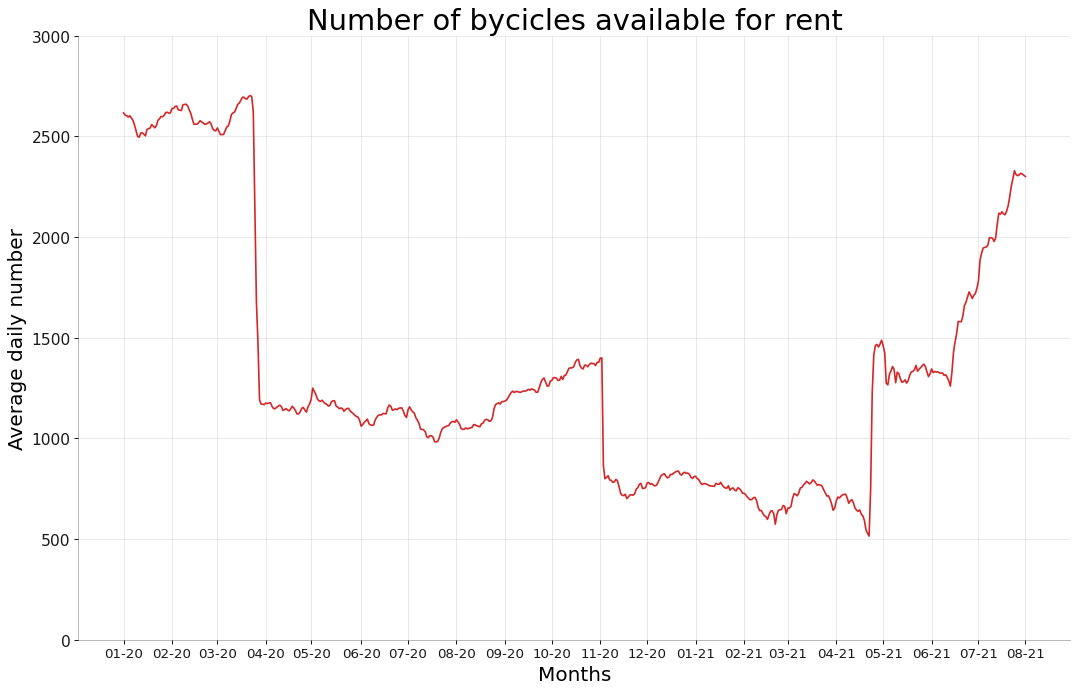

In [74]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('ride_end', 'available_bikes', data=df_mean, color='tab:red')

# Decoration
plt.ylim(0, 3000)
xtick_location = x_loc
xtick_labels = x_lbl
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.9)
plt.yticks(fontsize=14, alpha=.9)
plt.title("Number of bycicles available for rent", fontsize=26)
plt.xlabel("Months", fontsize=18)
plt.ylabel("Average daily number", fontsize=18)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

### Ride count

In [9]:
cols = ['old_index','lat_begin', 'lng_begin', 'lat_end', 'lng_end', 'ride_begin',
       'available_bikes', 'uid_begin', 'uid_end', 'standing_before_ride', 'calculated_distance', 'name', 'distance']

df_count = df.drop(cols, axis = 1)

In [12]:
def just_date(s):
    return s.split(' ')[0]

df_count['ride_end'] = df_count['ride_end'].map(just_date)

df_rides = df_count.groupby('ride_end').count()

df_rides.reset_index(inplace=True)
df_rides.head()

,ride_end,ride_time
0,2020-01-01,769
1,2020-01-02,1147
2,2020-01-03,1199
3,2020-01-04,1347
4,2020-01-05,1098


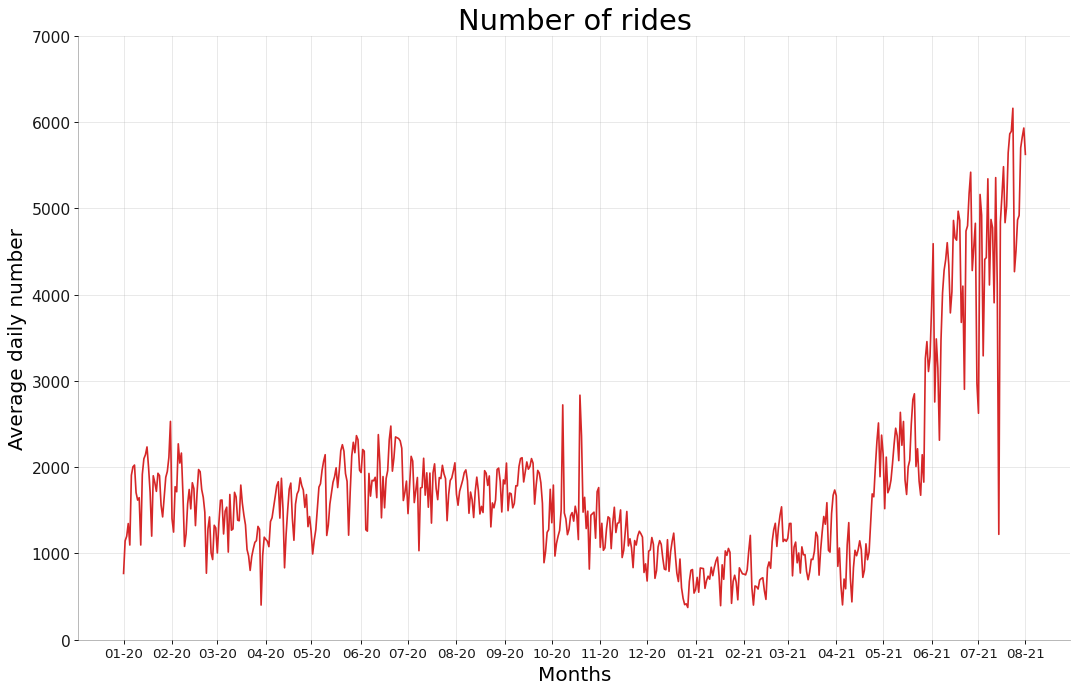

In [56]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('ride_end', 'ride_time', data=df_rides, color='tab:red')

# Decoration
plt.ylim(0, 7000)
xtick_location = x_loc
xtick_labels = x_lbl
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.9)
plt.yticks(fontsize=14, alpha=.9)
plt.title("Number of rides", fontsize=26)
plt.xlabel("Months", fontsize=18)
plt.ylabel("Average daily number", fontsize=18)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()


In [87]:
df_rides.head()

,ride_end,ride_time
0,2020-01-01,769
1,2020-01-02,1147
2,2020-01-03,1199
3,2020-01-04,1347
4,2020-01-05,1098


In [67]:
# Importing data on countermeasures
url_c = "covid19_final_set.csv"
df_c = pd.read_csv(url_c, sep=';', low_memory=False)

In [75]:
df_infect = df_c[['date', 'new_infections']]

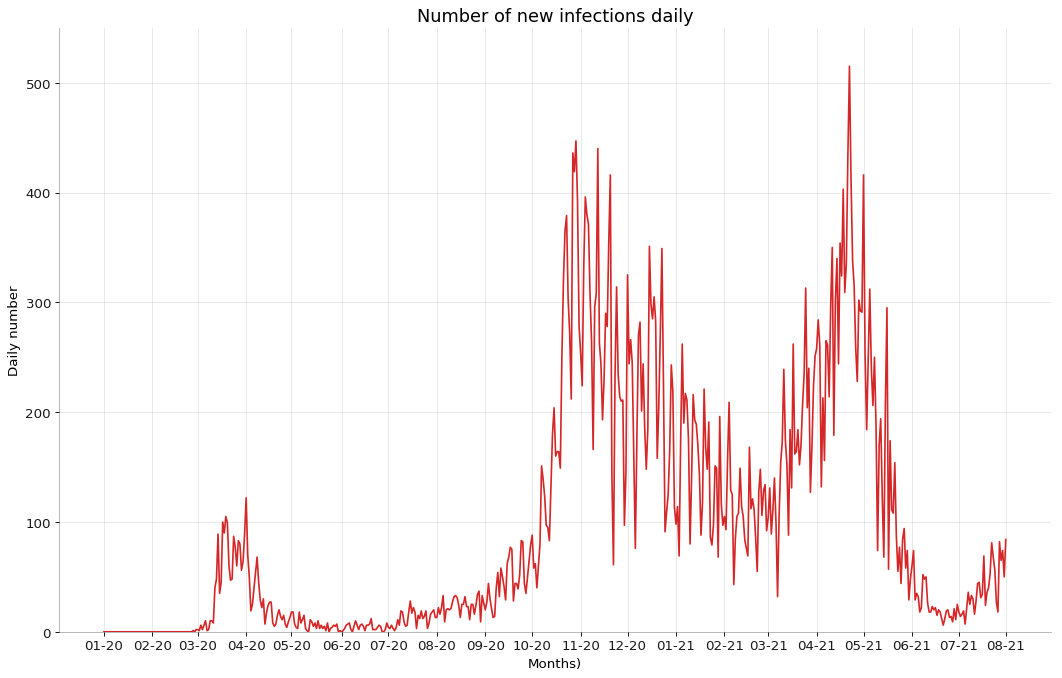

In [79]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'new_infections', data=df_infect, color='tab:red')

# Decoration
plt.ylim(0, 550)
xtick_location = x_loc
xtick_labels = x_lbl
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.9)
plt.yticks(fontsize=12, alpha=.9)
plt.title("Number of new infections daily", fontsize=16)
plt.xlabel("Months)", fontsize=12)
plt.ylabel("Daily number", fontsize=12)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

### Determining avarage number of bikes for monthly intervals

In [83]:
def parse_timestamp(el):
    b = datetime.datetime.strptime(el, fmt)
    return b

In [84]:
fmt = '%Y-%m-%d'

In [85]:
df_mean['ride_end'] = df_mean['ride_end'].map(parse_timestamp)

In [97]:
month_marks = []
for index, row in df_mean.iterrows():
    m = row['ride_end'].month
    y = row['ride_end'].year
    month_marks.append((m,y))

In [98]:
df_mean['month'] = month_marks

In [101]:
df_mean.groupby('month').mean()

,available_bikes
month,
"(1, 2020)",2567.516129
"(1, 2021)",765.225806
"(2, 2020)",2597.137931
"(2, 2021)",656.071429
"(3, 2020)",2347.838710
"(3, 2021)",733.709677
"(4, 2020)",1152.466667
"(4, 2021)",838.533333
"(5, 2020)",1161.967742
